# Text Generation

This tutorial demonstrates how to generate text using a character-based RNN, LSTM, and GRU


# 1)-Import key modules

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, SimpleRNN, GRU
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

Using TensorFlow backend.


# 2)-Loading data

I wll use patent data related to electric vehicles. I have got this data parsed from USPTO.

In [2]:
text = open('EV_patent_Gen.txt', 'r').read()

# 3) Checking data and setting parameters for modeling

In [3]:
hidden_nodes = 128
batch_size = 256
file = text
maxlen = 200
step = 3

In [4]:
type(text)

str

In [5]:
chars = sorted(list(set(text)))

In [6]:
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [7]:
# build a sequence for every <config.step>-th character in the text

sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

In [8]:
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# 4)- Building Modeling

In [9]:
model = Sequential()
model.add(SimpleRNN(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="rmsprop")

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               20352     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3870      
Total params: 24,222
Trainable params: 24,222
Non-trainable params: 0
_________________________________________________________________


In [11]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [12]:
class SampleText(keras.callbacks.Callback):
    def on_epoch_end(self, batch, logs={}):
        start_index = random.randint(0, len(text) - maxlen - 1)

        for diversity in [0.5, 1.2]:
            print()
            print('----- diversity:', diversity)

            generated = ''
            sentence = text[start_index: start_index + maxlen]
            generated += sentence
            print('----- Generating with seed: "' + sentence + '"')
            sys.stdout.write(generated)

            for i in range(200):
                x_pred = np.zeros((1, maxlen, len(chars)))
                for t, char in enumerate(sentence):
                    x_pred[0, t, char_indices[char]] = 1.

                preds = model.predict(x_pred, verbose=0)[0]
                next_index = sample(preds, diversity)
                next_char = indices_char[next_index]

                generated += next_char
                sentence = sentence[1:] + next_char

                sys.stdout.write(next_char)
                sys.stdout.flush()
            print()

In [13]:
model.fit(x, y, batch_size=batch_size,epochs=100,callbacks=[SampleText()])

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
770/770 [==============================] - 0s 646us/step - loss: 3.2148

----- diversity: 0.5
----- Generating with seed: "ry electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperat"
ry electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperatrttft rrtrttertttrttrrrrtterrttrorrreyttotrrt tsrrttrttttrrtttothr rtirtrtltrtrtrrettrhtthewtrttrrrrr eerttmw rctrtrrrotttrttorratrtrrtttwrrstwrutrnttrrt ettrrttetretttthrteriertietrrttrrtrrtttttittt 

----- diversity: 1.2
----- Generating with seed: "ry electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is h

a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is higher tt atVoeeieehae seraxrafr
mvd aeeyoeeuefep eucie
 ecaefe plp, r e  hsdamrn rrafanogileetrt neiesrihe
eldfepareesiefefrT hl.xtee ,e
uieyiehoesurme
maerVeenemtgar ellona aheusAeehees ireiaxelehmeetqx
vgd
Epoch 7/100
770/770 [==============================] - 0s 478us/step - loss: 2.6972

----- diversity: 0.5
----- Generating with seed: "generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combusti"
generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustieeeeeeeerfee eeeeeeeeiereeeerceeereeeeeeereee rereeeeeeeeereee

ombustion engine using the rotary electric machine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotaryqm ca etyqtrpwtetncsereiaiopApti f asgten msuorcgoton vrwt lt.ptonn rcfioom scnemtyrraepaqTttpupmlchnropnrd exets ad erraheA  o fenlrrc pnoi orrxefxosrgyecTsufueaAlartreeiucqasptylr,treeo.atof groVm h
Epoch 13/100
770/770 [==============================] - 0s 460us/step - loss: 2.4091

----- diversity: 0.5
----- Generating with seed: "hold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is high"
hold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is highar hnxddf evfa

 hovgarotdgexeiirbctVgmhlrg eti hT eren uln o

r the rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibiti.r pTcrroiees rhneren.xmi tyhemieurr mhromrTrehasro cte  aosrht    efesheoeeednaieoen  o
oesx. 
peaiAitb onuen  eiemrel etmer hdmfdrh tscetgettg pnhroemrt  oo tiesehmererehpt eeettd eepei tin oneeoar
Epoch 19/100
770/770 [==============================] - 0s 477us/step - loss: 2.2507

----- diversity: 0.5
----- Generating with seed: "re which is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a rotary electric machine to generate power to move a v"
re which is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a rotary electric machine to generate power to move a v,n tl.eteeerre ef ppr re hoc tlterdlc tbil eryine oftert efsc

 includes a rotary electric machine, an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine tah rrtntoTgtfhhcirroigstneieltarphnusoe
amyneheeerturotrr arp eririncrisqrreeathaaureAeutem gyrerahosw heli
 tr rrrptcvn ershnvioognwe o,trosaerlttgrtt snroertuet r tfterpetesuro ei rrwhocyattemviri
Epoch 25/100
770/770 [==============================] - 0s 451us/step - loss: 2.0973

----- diversity: 0.5
----- Generating with seed: ", the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if th"
, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if threeeritterirerrehere oertteeeeeeretererecet e eeener e eeeeee

rnal combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit thni.des  inert  ieheeteti rereretsii rhhevmai tarmr rstn  r imen tn  eoatdsl reemree peratu sresmre pohd onerodhvimdo eotertoroc oohaeahe eftreursehihn he mm,encaotu nmturei xho  a leic ooe eeioe eoi
Epoch 31/100
770/770 [==============================] - 0s 445us/step - loss: 1.9907

----- diversity: 0.5
----- Generating with seed: "ry electric machine

According to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rot"
ry electric machine

According to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rot re preh ne  r tareieteoreoeahtndeterinmtnstoe  en toe  l ern

tary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the testtneaoe hotaer tsrec,enileiebre mesnenbt ra a
h eo rme rauaethclttorhroT ftoin esrhlcviorshpreecftpc gTorireta
hnp hhtr butehotretotesy tett reh e,irn ovhpmretatpronesheAoorro  eleeioreaavth oumfiu, 
Epoch 37/100
770/770 [==============================] - 0s 451us/step - loss: 1.8217

----- diversity: 0.5
----- Generating with seed: "at is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another aspect of the present invention, a vehicle includes a rotary electri"
at is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another aspect of the present invention, a vehicle includes a rotary electrig mochane to   ie hnt  eeeeiiet thnhegtor oha hin th.n  trpei

 rotary electric machine to generate power to move a vehicle which includes an internal combustion engine to be started by the rotary electric machine to generate power to move the vehicle, the methodpT nciftr dhtsitos  .eoitlt trbog is lto  ic tediegitelec trd o
b iobelb ttiayprur
eftfvyoorecwlttiofm hhdrg moythterpcdeooyr m heeyir texnetineaooAsueuaemv,perin t a trtr, enbphi  er itramlaryte  tll
Epoch 43/100
770/770 [==============================] - 0s 451us/step - loss: 1.7480

----- diversity: 0.5
----- Generating with seed: "ricts the power generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the i"
ricts the power generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the i  erttrre ee ste ttre eeteette  eretti  e  rtett   eeeti et e

tarted using the rotary electric machine in response to a request to start the internal combustion engine, a temperature sensor that detects temperature of the rotary electric machine or temperature oo sbsu rguotnmhue,nfxr..hsbcighV ihtc
cpiletqan. oomuTngivee.irttsf 
lsft ict,eu ted ome,rupesi
ys irsbe.gonnacued v. boe urTb rdohpdAnn uv. ic xaghtt.qguesrite,rnmontrApa uituoofdunolanlTpute
ftrlayi
Epoch 49/100
770/770 [==============================] - 0s 451us/step - loss: 1.6344

----- diversity: 0.5
----- Generating with seed: " restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine if the temperature is higher than a "
 restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine if the temperature is higher than a aerituetiro athit or retereieetaihiee torhtdpchrfcyotd  hrctr

 of a drive circuit for the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threuehtte enmttueg fmrrteem  arhero hnd hh ihiitteafe ccrhepecwtrbs
 e h retgoabhh poiec oe mhtg   ahhimi ro hhi  hn ehtlrtoy
  mVeuhen ecgt eon roes eeharry  cesipt  r  en ntrgs plaotwil ir gstoptar  
Epoch 55/100
770/770 [==============================] - 0s 445us/step - loss: 1.5250

----- diversity: 0.5
----- Generating with seed: "hine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to an"
hine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to ane  reshraroterihis con t  eheetite eciein therer aemio e o ir

thod includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if the temperofcitsan eeirnorgumqt pc nid ta  er toe   t as h e ai vhn thn ea oteiemee llsr alhenpoharerigecrnimrs  Thtirit so vwgitrao rehssttat irgtcrii aoryrvgurg
 ehc n trt if  hths elaftrer dcgi 
ininrtrrn al
Epoch 61/100
770/770 [==============================] - 0s 447us/step - loss: 1.4589

----- diversity: 0.5
----- Generating with seed: "higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold "
higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold te angatu ton rn en porature ichtit rrm an poe torecratu tore

move the vehicle. The internal combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machgre toa ty rds temicusis try tne ay ,vcctdi empfhrenob.fcmhnebos  ocrroVcgl v renctudthlshgtte oemaethe  o h tngtreilfenitus mto sb hel cdiTrsouot ra elecnttg cerottteb resct  i efahtrpc al arrthiemst
Epoch 67/100
770/770 [==============================] - 0s 449us/step - loss: 1.3782

----- diversity: 0.5
----- Generating with seed: "achine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The limiter restricts the"
achine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The limiter restricts theerttar resectn rempne tore etts o rature al roturoo  urtter r

power generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal cob,upiiotsmchpncthncmoopgote aerptii  ghfertci  cibiheerotdmyimlm lggrsg  n mmieeaeticehstrlmen ahrt iahrryifldpahin ricuTuchaedaiAsgiricht
qhfta teeteedetbofgoubrotc rraheigudoorfves tsrofg o.n,yrbmsn
Epoch 73/100
770/770 [==============================] - 0s 450us/step - loss: 1.2778

----- diversity: 0.5
----- Generating with seed: "ion, a vehicle includes a rotary electric machine, an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal com"
ion, a vehicle includes a rotary electric machine, an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustin  rcghne hhes the eithrrthl rothreaiaesth e  hhd thhrri

ibitor that prohibits starting of the internal combustion engine using the rotary electric machine if the detected temperature exceeds a second threshold temperature that is higher than the first thred aepio reritedhfnetderp accot tf taa ms tsoatibnpo,hrmmoc ythltciaihptdatlratiTe lnc,tu lhwuci,l rothlcr tf,onattemihleccne,tm.eesttre efvcrri en othen ihe pttury eheres ctmicretaresebtehptrafcredit 
Epoch 79/100
770/770 [==============================] - 0s 449us/step - loss: 1.2350

----- diversity: 0.5
----- Generating with seed: "re sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate power to move the vehicl"
re sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate power to move the vehiclbtafir mecatig  er hrn olmthe teretare erthin ofmhhe torm e e

achine to generate power to move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by thettirr e vopitetaerielasu.tlef 
r tli ohtaervc mowhuy ale rgih mogvrtta e elistuimamaie oen ocec gampmtinir rymAeabtrd    cfratrg.e  tlereron flcrm egseii h euahra  hectcmr su,y f 
dm
ed tomaerecef yhe
Epoch 85/100
770/770 [==============================] - 0s 450us/step - loss: 1.1800

----- diversity: 0.5
----- Generating with seed: "y electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the tempe"
y electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the tempe ature ie tett re anathee ofar th eeatere af theer tar  ilers

According to another aspect of the present invention, a vehicle includes a mevgoo slhhdrlshvehioroubr dhmanft gm aoegih rytpr  hred tps rritpc un te  eipotdrc d csib todor eadpte ufratfrchmcsariy temuigeeotlrnb leepenrsteit ra arTeaathimeeuicpte oorit rotoan pefitnd ,  hhie 
Epoch 91/100
770/770 [==============================] - 0s 451us/step - loss: 1.1627

----- diversity: 0.5
----- Generating with seed: "lectric machine to generate power to move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generat"
lectric machine to generate power to move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generateri esttinerethre  oacite ootans eemper ture ie  onhtre  ieptrrt re hetporet re eeteire an rec ohmeterterptrature iotrotert ro ratereoaf reter the rotary e ertrir machirethar ee ehret ra

According to another aspect of the present invention, a vehicle includes a rotary electric machine, an internal combustion engine, a temperature sensor, and a limiter. The rotary electric mahhinesnm oe ueratureda eoattre eofatu iieefiefe shuiemti ioepeyermrcesfto r rnterreromorte ter teature gftinreretafes es ttr terpn  eshotditn  erptta  in gicerat  e ehaftraT her tg r errr     trttt
Epoch 97/100
770/770 [==============================] - 0s 449us/step - loss: 1.0069

----- diversity: 0.5
----- Generating with seed: "rated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engi"
rated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine,ifes citotr re afia tet ie tinetro  ecterig re in tir temherature if ei

**As model has increasing epochs , we can see better results. Epoch size can be increased but, there is no need as we have come to a point where there is not improvement.<br>**

It is better to apply another model inseatd of RNN. Problem is that RNN are not very good with a longer sequential data of texts like our case

# 5)-Applying LSTM

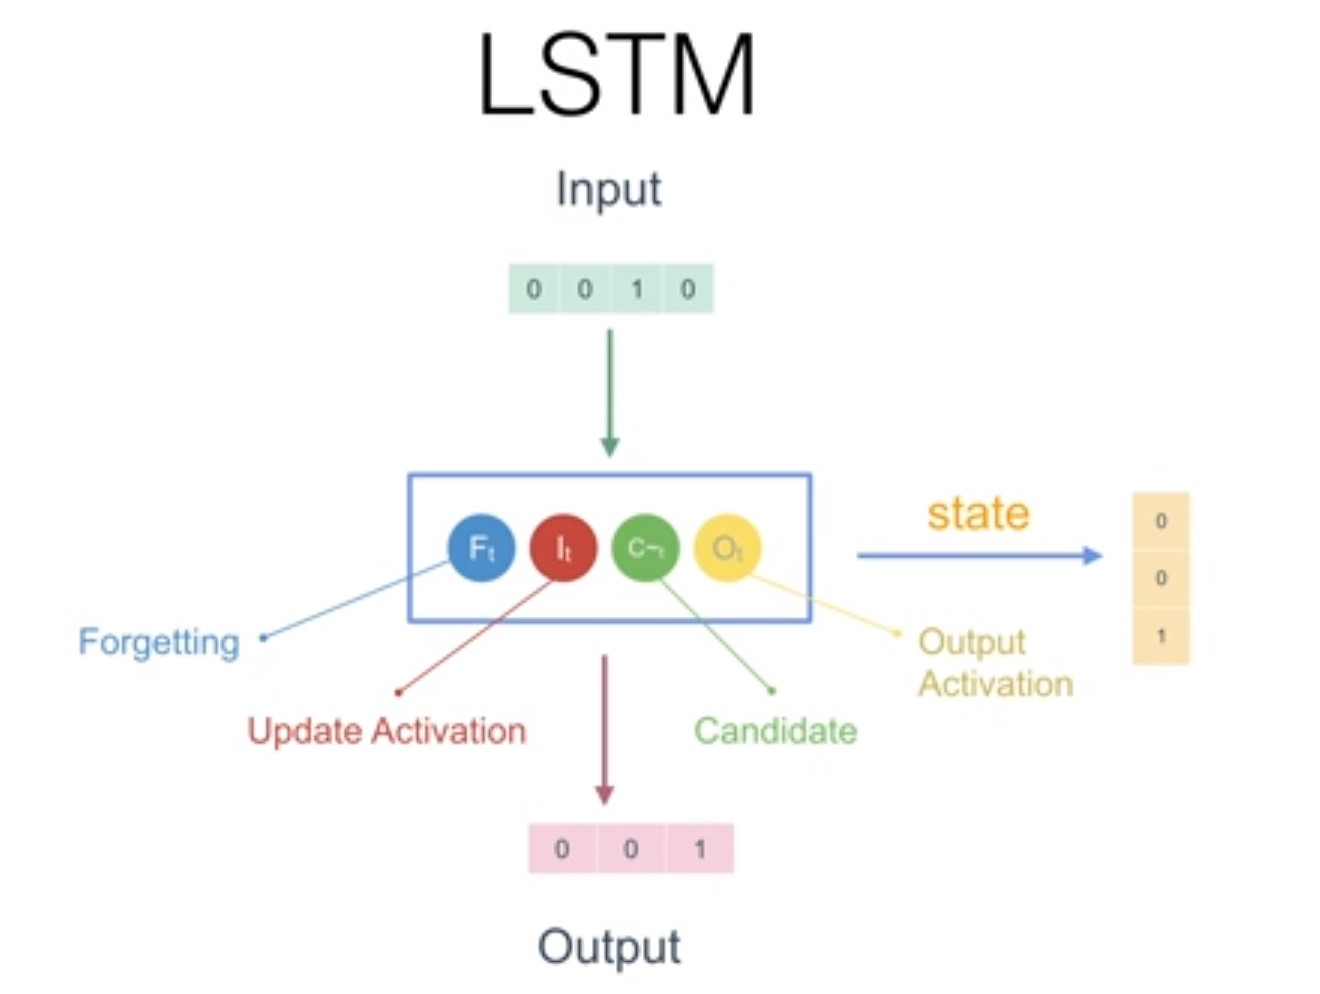

In [14]:
from IPython.display import Image
Image(filename='lstm.jpg')

In [15]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam")

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               81408     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3870      
Total params: 85,278
Trainable params: 85,278
Non-trainable params: 0
_________________________________________________________________


In [18]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [17]:
class SampleText(keras.callbacks.Callback):
    def on_epoch_end(self, batch, logs={}):
        start_index = random.randint(0, len(text) - maxlen - 1)

        for diversity in [0.5, 1.2]:
            print()
            print('----- diversity:', diversity)

            generated = ''
            sentence = text[start_index: start_index + maxlen]
            generated += sentence
            print('----- Generating with seed: "' + sentence + '"')
            sys.stdout.write(generated)

            for i in range(200):
                x_pred = np.zeros((1, maxlen, len(chars)))
                for t, char in enumerate(sentence):
                    x_pred[0, t, char_indices[char]] = 1.

                preds = model.predict(x_pred, verbose=0)[0]
                next_index = sample(preds, diversity)
                next_char = indices_char[next_index]

                generated += next_char
                sentence = sentence[1:] + next_char

                sys.stdout.write(next_char)
                sys.stdout.flush()
            print()

In [18]:
model.fit(x, y, batch_size=batch_size,epochs=100,callbacks=[SampleText()])

Epoch 1/100
770/770 [==============================] - 2s 3ms/step - loss: 3.3875

----- diversity: 0.5
----- Generating with seed: "l combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit for"
l combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit forx ieTr,V
mw
bcVsutvfvohgnxcq.aahyrs lchhTwxbV
Vmldnpuh
qcc nhuoVcAcbtTw.p

Apg.cAv fAsi,udchArne,oVno,mryapavxyfdf.xos.ovtml,xita
wvVVqm h drgfyyf.sstAont
ovmse,tyipwi,lamTe.rehqt 
vVaet,Teffnuwt
tvnn

----- diversity: 1.2
----- Generating with seed: "l combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit for"
l combustio

r the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, au sngens  rmeosuv,ulxgagrgemo.vndi  taVi  lcihr i aaiw rn rol te s
eiuht erexrv r
 rtieh.ahrliTrerara  e  ,toAsa  nl teht u mmpmtr Vaaet air a ihtmp llerthnmlstietave h e eireto re.en,mr ,thdet eeetl 
Epoch 7/100
770/770 [==============================] - 1s 2ms/step - loss: 2.8430

----- diversity: 0.5
----- Generating with seed: "n engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate pow"
n engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate pow  l  hrtt      re   uh  hil   h      rrh   eh       h crre     r

 an internal combustion engine that is started using the rotary electric machine in response to a request to start the internal combustion engine, a temperature sensor that detects temperature of the luhpsno tsemdreess aetepne pfuhea bheeectqaemn cteee tet iseT ee rteeertnoeei,gsohgtil qe a gi   e rrh rroththclnuhemocteoinnehtsinmte,oms logirp  huvttogeeunttamot he stetutaechceectlhmreerrenovletht
Epoch 13/100
770/770 [==============================] - 2s 2ms/step - loss: 2.7533

----- diversity: 0.5
----- Generating with seed: " the rotary electric machine to generate power to move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The "
 the rotary electric machine to generate power to move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The eeee e   itettee ltttsi tt oet eoretirhgete une et  e ret aette

ntion, a vehicle includes a rotary electric machine, an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal cci onoolht lroaa ea h cedbau  td tehvmmmbahaano  nv ema tco tom inheheerdiw hoieseaeiafammhulcpi ttn neftecr hTgthetsbomiaghieugfyeaaAiegho tron i eor nrlvh oslfi uarcb a t uarn evhne  ei      h eehic
Epoch 19/100
770/770 [==============================] - 2s 2ms/step - loss: 2.7314

----- diversity: 0.5
----- Generating with seed: "hine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor tha"
hine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor thaeieahti e  aiern csrheamitaifne ei e c io  ecr t tnstene i ciie

first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold temperature whcitrsdsdenceip ri aao,p iitl fcuunoerinuheiei .bthieir egiewhieciuoh o  to e bi
 nuoulsdivaiycttbtrubnamir aebpttelr vo fncehc h rcscrttri iptdh recsrhd mceetruartneaetnri gnh td nieeyethtiniidagffoaA
Epoch 25/100
770/770 [==============================] - 2s 2ms/step - loss: 2.7488

----- diversity: 0.5
----- Generating with seed: " the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another a"
 the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another ai    hm  cgi a eaise ae  i     i t  aeoceieso t ieitar  eearm t

According to furmrnetoa e r tis vcerea eeAa tereuespaahetcfrrferaoto msresttrnrhutrl afbec rotrxih  eroauriihtetr r l reti ar.bairecrtt tirott ou g nseei cryreherm ercderccrhearee a eeldot
bao Aal ay rm ue eegeghpeeo
Epoch 31/100
770/770 [==============================] - 2s 2ms/step - loss: 2.7344

----- diversity: 0.5
----- Generating with seed: "an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric ma"
an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric mah r treefrr rarhee eeerre trerr  rete er er a  eit  iireei ie  rtrrrahrere rroi oorr reereerr e urrnrtereoreeoirteererrfaeererr  et ntreo rre r re are eare  r e oar s roeer er tarueerrred r rrptrreefr

----- diversity: 1.2
----- Generating with se

ects temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The limiter restricts the power generated by the rotary electric machine if the temperature is hirh ttaisilyovm cecu haivri mh,cdsafirn nvih  eenhn vrtoemaetcarfea uvdedme id efnmntesmr ln e orituia dto t
rotehiccraeV atnen heehesxw n p menmeids rrcaorsshsveeutt.nv rttderdetihi tii..geearffe ehdl
Epoch 37/100
770/770 [==============================] - 2s 2ms/step - loss: 2.7154

----- diversity: 0.5
----- Generating with seed: "n engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate pow"
n engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate powe c ea  ecua e ttteeeu  ttteet ete ee het  e re t te i ttefpon 

wer to move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machcwlechhpupruttor i trc hetlc ehmi bc etstneingcra
tmres ei recdaelhmpderusleah asatslsnchsoslpneusuemhne irioo ar hnteoefst leeg meaahtecoingheveemoc trr fnun vhsruffi ci.acetcrae fauti eaupf ehatbnst
Epoch 43/100
770/770 [==============================] - 2s 2ms/step - loss: 2.6955

----- diversity: 0.5
----- Generating with seed: "ric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the internal combustion engine using t"
ric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the internal combustion engine using tre eh ae  t ir neehi temt a rohdipeiir ar the ce ueaee e rretoe

tric machine, an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotanrexouinhittgmlrtren icu Abc eiieiiauosot crers eatcf ur e rhiim ctm eorte o ettetur ie usdrae, mnes mleausifhe gcysiehvneactn e eichetchitcivp norhhcntt
uo rprn rhhi dnhbetn e est nc aseue ireucbc ab
Epoch 49/100
770/770 [==============================] - 2s 2ms/step - loss: 2.7125

----- diversity: 0.5
----- Generating with seed: "he rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited "
he rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited one  holhouete  n eh  eisii ciis iiihiih ii isaiee t tehhdia in

According to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric uv  eripehn.chvmieml volrbtgieemistttuhc h hecacorsr eeariobimtsiuihxe mgnafus n rt htemrouliinreseotohretaAio nhenlenegecigelthelthircscoii rvoh frhettnohiupeacmehue otliooyhtcuneeiaethpihiusthehghms
Epoch 55/100
770/770 [==============================] - 2s 2ms/step - loss: 2.7097

----- diversity: 0.5
----- Generating with seed: " method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if the tem"
 method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is restricted if the temceeemec eeeemerhetyhec ee eoeteeepeeeeeonrreh eagese m e hhr hemferommg

According to another aspect of t pemimhtliotnepfheeas hhhhreh aotmtgte  ttot imeuso lcorue acsefgf rage gtchngeloioc mshre dtogrmu otehihhtcyrweetuetshheeimme tttet rniiwum yccrosctue teuvhbn hetdrgehboim ogymiguneoa t ,motnntgtitea
Epoch 61/100
770/770 [==============================] - 2s 2ms/step - loss: 2.6784

----- diversity: 0.5
----- Generating with seed: " limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the "
 limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the roeeehe ettrt terteea  tr hrteteer rta tte r etr t toeterhre  ter  tet rt  ereehe tesiet tete terier erteegeeett eri otetrettettereectmeeteor r eettrit e r er ttrr ter ae ehmpeet  heuetertt e he tee r

----- diversity: 1.2
----- Ge

cle includes a rotary electric machine, an internal combustion engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engsa se srasfcrio oareaebrer eeirthtidrig m saprcnroremv hae iers brhgtrereiuAsrausaoecrrnst aterv nbecregcarnharithrhrd, diretrsTtr.aidrtaittieegtb rearrererct iwhrce rtosageermir t atrs re  soipriveev
Epoch 67/100
770/770 [==============================] - 2s 2ms/step - loss: 2.6885

----- diversity: 0.5
----- Generating with seed: "f the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request "
f the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request rmrerrrreurae bererrr  eerrlorrieeeerresererreerererereraereere

 threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which iitetnrxAahi eim  tx oggsl tcs t de.go or tanei, orre nly tl ii i eept reae t fheoh imh ehhugitam edtbm  cem npnhiar  ehemh r no a rpry e fqcaitvxofle ievrieta,csch fbaimueoeo  r  e i nl, eeovlwe we  a
Epoch 73/100
770/770 [==============================] - 2s 2ms/step - loss: 2.6708

----- diversity: 0.5
----- Generating with seed: " to start the internal combustion engine, a temperature sensor that detects temperature of the rotary electric machine or temperature of a drive circuit for the rotary electric machine, an output limi"
 to start the internal combustion engine, a temperature sensor that detects temperature of the rotary electric machine or temperature of a drive circuit for the rotary electric machine, an output limie  or ee    e ree eert  i rees  areniteee l    e ie eti  re rc 

tric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibmn iherlThee tsopgdeohd slwsisopvilambreircrctne e itt,e  nlgnlrurntiTeben
eremmnrenunhvtce c adhe iti noeco abrtctenifogutermoagtrheclibtp b rnetesptcnrn ets umuhrleametAwylli,gyihb lheeilrleoc  iitc
Epoch 79/100
770/770 [==============================] - 2s 2ms/step - loss: 2.6258

----- diversity: 0.5
----- Generating with seed: "perature is higher than a second threshold temperature which is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a r"
perature is higher than a second threshold temperature which is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a rlmaretthe eienlhtheeeae ft goterenea tee eheootieerttte tcu eth

e rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited fr ooa osetiwifhixlnegi  i toomdr  m sgf it nhfeltobcinorh ohegaoe  onhinesm mpeeyhiwirnetlyrdtt urhuc  hu ttotipterset,prcei f
 hialhns aornoeen irarerur stmharetfsfg oltoaeai hei ofes erioelexfhfigca
Epoch 85/100
770/770 [==============================] - 2s 3ms/step - loss: 2.6049

----- diversity: 0.5
----- Generating with seed: "machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine if the temperature is high"
machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine if the temperature is high ne t hcrio nireoi tatu n ot ctetioeihc taie ttiie  tethhcterf 

he vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request to start the internal combustion engine, a temperature sensor that detects temperatneaatyd is claetaccru se i fhet qre o puee gxcruhutiegeeteeeredni tt ni n ncciow doeemmstlenepgeanebtiaupi ee  t muiiorha n taetrnrcscmaterf a l aeeurp  tfe n  ratohe e roe utenm nr n  egt gme ei ett 
Epoch 91/100
770/770 [==============================] - 2s 2ms/step - loss: 2.5846

----- diversity: 0.5
----- Generating with seed: "ich is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a rotary electric machine to generate power to move a vehicl"
ich is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a rotary electric machine to generate power to move a vehiclhrr  rer teerue  m eoere eee ettr teenite  ee  er os te hetecte

ncludes an internal combustion engine to be started by the rotary electric machine to generate power to move the vehicle, the method includes detecting temperature of the rotary electric machine or ofgeveaonfi cnta ruenot rohpea iiinoc ptf lhemosl vpmteneuatehonacftrgage c,r o eren hhr aeserwerraer suagpegcrrtrsard e r seeethb.iacue teheehery d r m etcum, serstiefeeihrai ihrsatcecivtmeemci,tpe chd
Epoch 97/100
770/770 [==============================] - 2s 2ms/step - loss: 2.5413

----- diversity: 0.5
----- Generating with seed: "ic machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the internal combustion engine using th"
ic machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the internal combustion engine using th et te c teree ee etceie nee er eoee nee tetee  eureaee necert 

# 6)- Applying GRU

For faster and quick output

additionally, there is mo forget gate in GRU

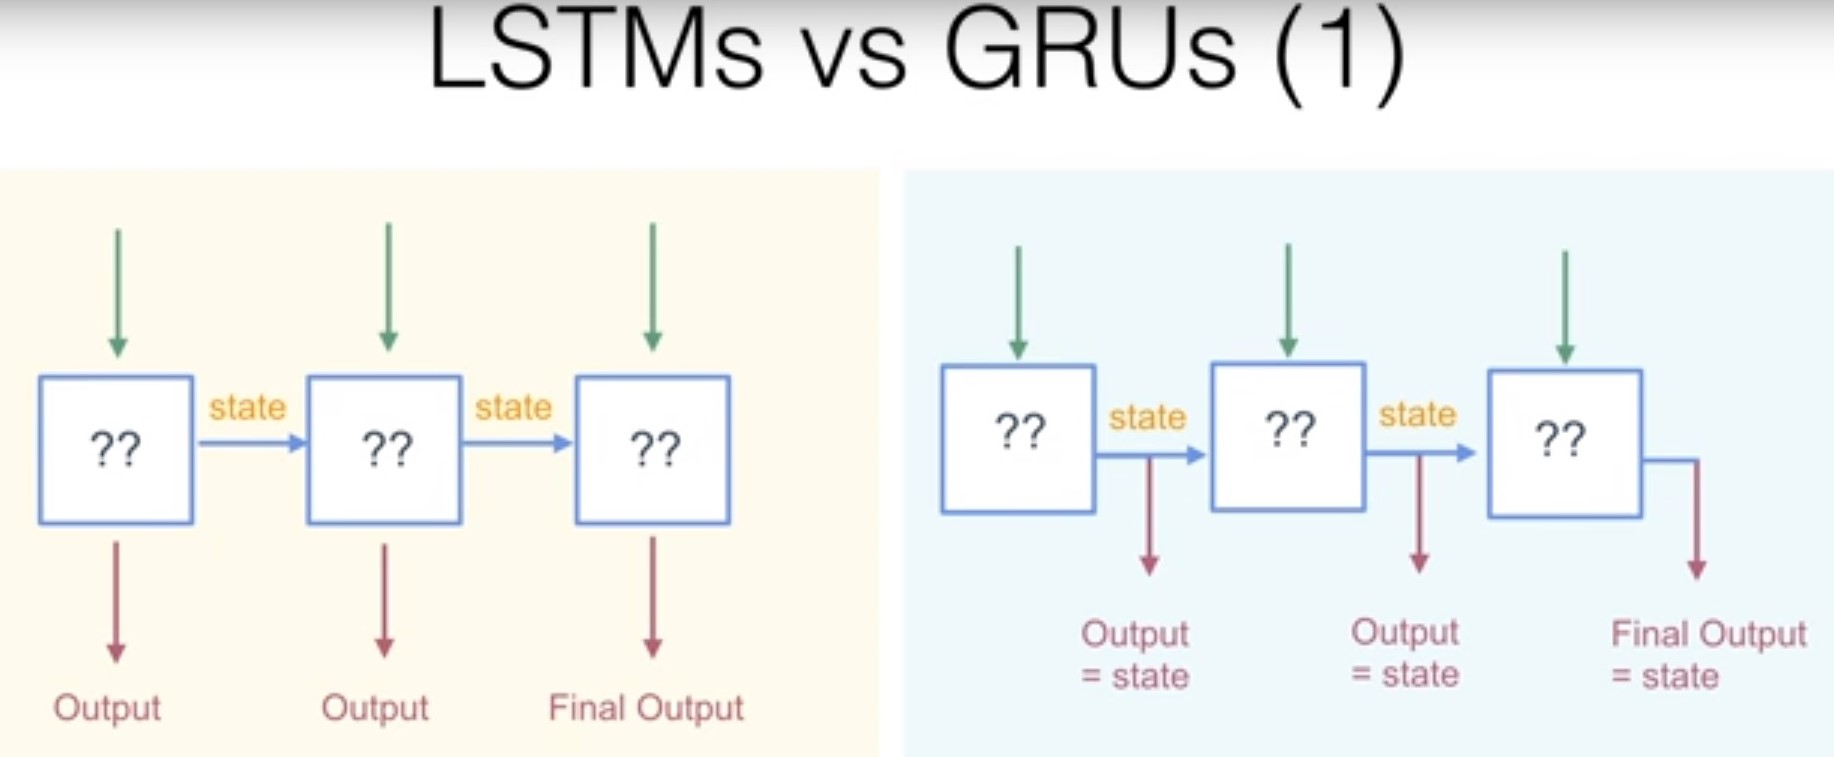

In [19]:
Image(filename='lstmvsgru.jpg')

In [20]:
model = Sequential()
model.add(GRU(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam")

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               61056     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3870      
Total params: 64,926
Trainable params: 64,926
Non-trainable params: 0
_________________________________________________________________


In [23]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [22]:
class SampleText(keras.callbacks.Callback):
    def on_epoch_end(self, batch, logs={}):
        start_index = random.randint(0, len(text) - maxlen - 1)

        for diversity in [0.5, 1.2]:
            print()
            print('----- diversity:', diversity)

            generated = ''
            sentence = text[start_index: start_index + maxlen]
            generated += sentence
            print('----- Generating with seed: "' + sentence + '"')
            sys.stdout.write(generated)

            for i in range(200):
                x_pred = np.zeros((1, maxlen, len(chars)))
                for t, char in enumerate(sentence):
                    x_pred[0, t, char_indices[char]] = 1.

                preds = model.predict(x_pred, verbose=0)[0]
                next_index = sample(preds, diversity)
                next_char = indices_char[next_index]

                generated += next_char
                sentence = sentence[1:] + next_char

                sys.stdout.write(next_char)
                sys.stdout.flush()
            print()

In [24]:
model.fit(x, y, batch_size=batch_size,epochs=100,callbacks=[SampleText()])

Epoch 1/100
770/770 [==============================] - 2s 2ms/step - loss: 3.4022

----- diversity: 0.5
----- Generating with seed: "ry electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temp"
ry electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temptubassATpVu eVcyiulr,fw.ncfpmiTlmiTpssgeinAh.pu,l 
tmivgfycqnst
qfyfmqm,qqryTVcdypVqbborehVVooT.mAniciilTrwv
Ahqte aTicynrobdmh,ytxhfdpnlxyy.na
wxqcglyTpui.ex
Axf.poga
s.ror 
 wirVnbhoTyx g. uhelyA,o


----- diversity: 1.2
----- Generating with seed: "ry electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temp"
ry electric

hyubnmmTb qylmrxmcab ladwhvAssihqunstoqiaoq
td Axw peacpgee.ymqdt.hbrvreg lcoifxyTle me vtladhTlr
mlAVmnnenieabpa
VprcaVuqai,
x.p.ifoq.nwtAfoxpa.miuxngwxgqfm
Epoch 7/100
770/770 [==============================] - 1s 2ms/step - loss: 3.0178

----- diversity: 0.5
----- Generating with seed: "threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is"
threshold temperature. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which isioi oheee eli noeeerc eiie eeie, eeeseee  eeht   oeieeieeoteecoeen eieeeee eeeeeeeetiiieeeeeeraeeeree ebueoeeeeeeeieeeeeteeeieee m e e eueoe e e  tee htee e heereeeaeierfteone ioe iee eeetee  e eeee e

----- diversity: 1.2
----- Generating with seed: "threshold temperature. The start prohibitor prohibits t

or the rotary electric machine. The power generated by the rotary electric machine is restricted if the temperature is higher than a first threshold temperature. The rotary electric machine is prohibi do
uis np,hAt Vycs necrrl t r pyeerles .eslfehirt hbt eyTqimenhllhtthe.ditp
thbh yrlcinxe lnAe r tbernnexTu eetrrynenmnryrttacnihv s,
nccgcreebh hhemgo  r  s apeorfth  i osTdmTac
umao ho oopeet rhhoq
Epoch 13/100
770/770 [==============================] - 1s 2ms/step - loss: 2.7584

----- diversity: 0.5
----- Generating with seed: "emperature.

According to further another aspect of the present invention, a method for controlling a rotary electric machine to generate power to move a vehicle which includes an internal combustion "
emperature.

According to further another aspect of the present invention, a method for controlling a rotary electric machine to generate power to move a vehicle which includes an internal combustion hrdeheeretien hehre fr otrinierinr    r chnu tnrriort  te emhte

emperature, and a start prohibitor that prohibits starting of the internal combustion engine using the rotary electric machine if the detected temperature exceeds a second threshold temperature that inualipA rpibt stip are r p.e  loaptaefr pTha hfrhot lmthgfm  t etercthretsegtecehmhtieiitcuarnfaomtyfntv tsl
dsyrtpesr ns dtrrhebedfoffbn,tenbnisrte. e cttnea aeecreeeyrtelrrycnAtrhby dfrihvrgdoecc hu
Epoch 19/100
770/770 [==============================] - 1s 2ms/step - loss: 2.6834

----- diversity: 0.5
----- Generating with seed: "ine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is higher than the first threshold temperature.

According to further another as"
ine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is higher than the first threshold temperature.

According to further another as n fhie hi hrettr etn teartetesetrtererra tte merher eereenett 

d temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibits starting of the internal combustion engine using the rotary electric machiv cvhnvseepuc,
ntuayTh  ecacta esn dyft uoleeacpuiacsoiqgtrt  h ers cbveyepmaorttyanihpysgptaiarhlTwe taseeyn omaoiti ioi htbtgi mtlhrly tcmdrnsspcccgg neraetbse Tleetcam iat  bsetfeyenosadstli tnfyor
Epoch 25/100
770/770 [==============================] - 1s 2ms/step - loss: 2.6487

----- diversity: 0.5
----- Generating with seed: " move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine is"
 move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary electric machine. The power generated by the rotary electric machine ise tee eethe hha n tesorire aufaara e nttson  u teotho hottt au 

According to further another aspect of the present invention, a method for controlling a rotary electric machine to generate power to move a vehicle which inclr alhgrt esotrggng sahecrnhturessrtc rsp hreneur teiornrae stfh umtteretonihfhniceiin maagl cl rinuehritcatg thna eeainarcuio htrs
 trtlltlnganaptierutcnroageta htfiblhcbubeeptlrponhsbdutooqii ldetrot
Epoch 31/100
770/770 [==============================] - 1s 2ms/step - loss: 2.5845

----- diversity: 0.5
----- Generating with seed: "eshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another aspect of the present invention, a vehicle incl"
eshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to another aspect of the present invention, a vehicle incleat eceaoee   or e t teruah teitthe heregee f h tte ertic  a teetprerethe ehe te a  eee tne ea hectee te

 engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit for the rotary cianpw  teeoeo nedehmor,c p a oosovamiefieacno uotuoereeoveyetelarne iee hetltAtbare t loonto rne slt etefslri iatwreehigntunhi.ttrfuetinrtnrhoghcterdibihynrnei reog rneele otner iadlceoneefechchal pi
Epoch 37/100
770/770 [==============================] - 1s 2ms/step - loss: 2.5444

----- diversity: 0.5
----- Generating with seed: "r that prohibits starting of the internal combustion engine using the rotary electric machine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold"
r that prohibits starting of the internal combustion engine using the rotary electric machine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold theeeoe inteertpe eoeeotneinehotnt  ho e  enneeeoe telee the n

ording to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in eltgsany d nae  t tnerset.eu opalpuoeph, aoaerae oouohi
eghrncghhif  agcg dnaeotludfrhrce r  r lefte teehhgotg o gecodfn  cfhegi meeea ueeterl  mo o tpih  me otdim mo eleoiopre hoyiintdnveiipfiamaestc
Epoch 43/100
770/770 [==============================] - 1s 2ms/step - loss: 2.4835

----- diversity: 0.5
----- Generating with seed: "limiter restricts the power generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from st"
limiter restricts the power generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start prohibitor prohibits the rotary electric machine from ste  e he  eo  eie  e t  e e  ee e the  or him  neeet reot e oe e

 electric machine or temperature of a drive circuit for the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the tempeewnyoc cte io teol enoiedtasti ad iomia a emeiein t heugeeceghrrg uoau ruothrt b sbbgtamin rgeeit e mn oiortgcu  aordoeaiiiie vg  uittmebnge  orqlcutecrfgi  edxmpmeslthr gosn e ce on imrrtpeeeregeiiee
Epoch 49/100
770/770 [==============================] - 1s 2ms/step - loss: 2.4297

----- diversity: 0.5
----- Generating with seed: "er than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is "
er than a first threshold temperature. The rotary electric machine is prohibited from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is st it a oio  tr eer he  iectoi te ie he  otari  te tat it rr  o

 engine, a temperature sensor, and a limiter. The rotary electric machine generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate powetgr n tt rcotouputeretue toooth peelitenthe aoa bnstlno theleenhoabtuniri iinu ole tr m n foshehihuehi u ateett uhfti teihfelycaci therem tertieoyatenionnh, thofecfvpotmmtthrgra hnriTsrrolmecho onr ct
Epoch 55/100
770/770 [==============================] - 1s 2ms/step - loss: 2.3588

----- diversity: 0.5
----- Generating with seed: "hine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to an"
hine if the detected temperature exceeds a second threshold temperature that is higher than the first threshold temperature after the output of the rotary electric machine is limited.

According to ane iee teerterle tereritertertmte tmeratetefther tererterter ate

ure of a drive circuit for the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a firstfis hdted effrsupsot ygtumef fabacauty  ge tets lw imfcgdoafoshovmern  tlritaifsnh eu iad nlee in  m btes crr ldtoipthqm pplir luhi sidmprsrsdas.reccr t eperrstltrle vo esferlmhtemie tfve ofer toneuct
Epoch 61/100
770/770 [==============================] - 1s 2ms/step - loss: 2.2799

----- diversity: 0.5
----- Generating with seed: "circuit for the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temp"
circuit for the rotary electric machine, an output limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold tempttrhthe chit ter te te the the tee the ittate  o ee bhe thr thr

stion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary electric machine or of a drive circuit for the rooligeetamele thoo leeaxtpere enbi xsdooalccifpothrbsittrrnimtbntfm erftspcrertle ui oy etgeod  o recoue reaogheatefotatr gor,grtemtdinpres ooiuei etcenerofehesaeegirn tggu oed ledtinhe or hdinofefilu.
Epoch 67/100
770/770 [==============================] - 1s 2ms/step - loss: 2.1824

----- diversity: 0.5
----- Generating with seed: "than a second threshold temperature which is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a rotary electric mach"
than a second threshold temperature which is higher than the first threshold temperature.

According to further another aspect of the present invention, a method for controlling a rotary electric machc iige o  erethnl dtle thin  iea the to taferttsn ooe thi  le h

. The start prohibitor prohibits the rotary electric machine from starting the internal combustion engine if the temperature is higher than a second threshold temperature which is higher than the firshirig r ttmtar hectefi winc mgrherecli,ermmuvelrgneoe ine aoterederte  cthi eopea tncemiee met rphn relert oomercthanemeooadwtrdtumi rrrfli ihmveshr hluthro lethreu thitoig y boihtsb atcmshlratletnoua
Epoch 73/100
770/770 [==============================] - 1s 2ms/step - loss: 2.0841

----- diversity: 0.5
----- Generating with seed: "r of a drive circuit for the rotary electric machine. The limiter restricts the power generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The star"
r of a drive circuit for the rotary electric machine. The limiter restricts the power generated by the rotary electric machine if the temperature is higher than a first threshold temperature. The start ita ectame ie tem retere aerathe  otererahine ater the tarate

utput limiter that limits output of the rotary electric machine if a detected temperature obtained by the temperature sensor exceeds a first threshold temperature, and a start prohibitor that prohibite Telomoid spcat hetaratins narmc momttsmtof ageieueryteccsmhorig lochifnldi goreterbeecfht aorl , ohrneopiny angefeso.sausohal ff tncesfnbale eguerhic aqle ghecvecngi nvecinpef, nbae Vhvrecoy aare ia
Epoch 79/100
770/770 [==============================] - 1s 2ms/step - loss: 1.9985

----- diversity: 0.5
----- Generating with seed: "es power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary e"
es power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the rotary eoter tertartarr matertrice atere so hotare terteitare eother th

According to another aspneTape hhleheronemtmmiaress btperhiea ii heferteacetrvs heito emaehtge aneteey elertiu.  xohigsemcomereterneig rfmegemrchad ,he lecadus ie tpeherb mpememhesfemftlrrerh ,uiine ieeaterVccgcrum aheii mci
Epoch 85/100
770/770 [==============================] - 1s 2ms/step - loss: 1.9568

----- diversity: 0.5
----- Generating with seed: "or controlling rotary electric machine

According to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is st"
or controlling rotary electric machine

According to one aspect of the present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is stherthe  eeeeooter  oheriterescthe thma hectmrtemrochengerettre ihe oohere ectemsere hectriserecomtare aherecteine temeareiter oectre aiher thme eoterhire aootere tomerthe temoecthe eoters iferthec moh

----- diversity: 1.2
----- Generating

 generates power to move the vehicle. The internal combustion engine is started by the rotary electric machine to generate power to move the vehicle. The temperature sensor detects temperature of the ormole sb hlr. dheaaneeri aeqgeipn ra potaglr prAlecla
r oor terraine rcdatatl thloorteritee  foadcgs efelcrsfsr verord mcpebit roauxsehureatom ,neratira tome oomit  ltee. thme ogotid  echesrsiod ahet
Epoch 91/100
770/770 [==============================] - 1s 2ms/step - loss: 1.8432

----- diversity: 0.5
----- Generating with seed: " a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request to start the internal co"
 a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request to start the internal comane ine thre ioe toe retert ine lmchhin  oherthe eii eorereder

ngine to be started by the rotary electric machine to generate power to move the vehicle, the method includes detecting temperature of the rotary electric machine or of a drive circuit for the rotary iaaeritf dampeieiraialerlaatir  ertnetemngempedtedteccem amtprstrribipr eotcrAhe mters rfserie eutama ooe fteeefdid hohifsg lnture thee yemiesthif in, tnges inairrtuVatinempena aorises gomerithr ihest
Epoch 97/100
770/770 [==============================] - 1s 2ms/step - loss: 1.7720

----- diversity: 0.5
----- Generating with seed: "he present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request to "
he present invention, a vehicle includes a rotary electric machine that drives the vehicle, an internal combustion engine that is started using the rotary electric machine in response to a request to  the ted eotarl eathin ,f roctri  ihettr  ece in eri e the  ene

GRU and LSTM both serve same purpose i.e to provide modeling for longer sequence of text as they both use additional gates to keep memory. 